In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from numpy.random import geometric, poisson, exponential
from scipy.stats import ks_2samp
from scipy.stats import norm,poisson
from numpy import linspace
from IPython.display import Markdown

## Utility functions

In [2]:
def computeEvents(V, ttx, trx, tn):
    Eb = 0
    Es = 0
    En = 0

    for c in V:
        if c == 'B':
            Eb += 1
        elif c == 'S':
            Es += 1
        else:
            En += 1
    
    return (Eb/ttx,Es/trx,En/tn)

def countSuccessT1(V1,V2):
    Cb = []
    i = 0
    for b,s in zip(V1,V2):
        if b =='B' and s =='S':
            Cb.append(i)
        i+=1
    return Cb

def countBroadcast(V1,V2,Trx,Ttx):
    indexes = []
    i = 0
    Cb = {}
    while i<len(V2):
        if V2[i] == 'S':
            indexes.append(i)
            i += Trx

        else:
            i+=1
    for ind in indexes:
        Cb[ind] = 0
        for j in range(ind,ind+Trx):
            if j >= len(V1):
                break
            if V1[j] == 'B':
                Cb[ind] += 1
        Cb[ind] = floor(Cb[ind]/Ttx)
    
    return Cb

def buildHistogram(Cb,Trx,Ttx):
    hist = [0 for x in range(int(2*Trx/Ttx))]
    n = 1/len(Cb)
    for k in Cb:
        try:
            hist[round(Cb[k])] += n
        except:
            print(round(Cb[k]))
    return hist

def buildHistogramV(V, l = 0):
    hist = None
    if l:
        hist = [0 for x in range(l)]
    else:
        hist = [0 for x in range(len(V))]

    for k in V:
        try:
            hist[k] += 1
        except:
            break
        
    return hist

def rmse(v1,v2):
    rmse = 0
    for x1,x2 in zip(v1,v2):
        rmse += (x1-x2)**2
    return sqrt(rmse/len(v1))

## Probability mass functions 
- Geometric 
- Poisson 
- Exponential


In [3]:
def geom_pmf(p,maxK):
    return [p*(1-p)**k for k in range(0,maxK)]

def poisson_pmf(lam,maxK):
    return [e**(k*log(lam)-(lam)-log(gamma((k+1)))) for k in range(0,maxK)]

def exponential_pmf(lam, maxK):
    return [lam*(e**(-lam*k)) for k in range(0,maxK)]


# Load data

In [4]:
f1 = open("r5-d0-result.txt")
raw1 = f1.read()
f1.close()

f2 = open("r5-d1-result.txt")
raw2 = f2.read()
f2.close()

In [5]:

Eb = 0
Es = 0
En = 0

Ttx = 1
Trx = 6
Tn = 1

Eb,Es,En = computeEvents(raw1,Ttx,Trx,Tn)

display(Markdown('<span style="color: #af0000">'+"P(S) = %.6f"%(Trx*Es/len(raw1))+'</span>'))
display(Markdown('<span style="color: #00af00">'+"P(N) = %.6f"%(Tn*En/len(raw1))+'</span>'))
display(Markdown('<span style="color: #0000af">'+"P(B) = %.6f"%(Ttx*Eb/len(raw1))+'</span>'))


l1 = 1000*Eb / (len(raw1))

t = Trx/1000
rt = l1*t

print("r(B)(Events/s) = %.6f"%(l1))
print("rt = %.6f"%(l1*t))

Cb1 = countBroadcast(raw2,raw1,Trx,Ttx)

hist1 = buildHistogram(Cb1,Trx,Ttx)

print("Success probability= %.6f"%sum(hist1[1:]))

<span style="color: #af0000">P(S) = 0.939021</span>

<span style="color: #00af00">P(N) = 0.000000</span>

<span style="color: #0000af">P(B) = 0.060979</span>

r(B)(Events/s) = 60.979200
rt = 0.365875
Success probability= 0.274183


In [6]:
pois_d = poisson_pmf(hist1[1],len(hist1))
print("RMSE Poisson= %.6f"%rmse(pois_d,hist1)) 
rv = poisson(hist1[1])
rvd = rv.pmf(range(len(hist1)))
print("RMSE Poisson= %.6f"%rmse(rvd,hist1)) 
geom_d = geom_pmf(hist1[0],len(hist1))
print("RMSE Geom= %.6f"%rmse(geom_d,hist1))

RMSE Poisson= 0.029950
RMSE Poisson= 0.029950
RMSE Geom= 0.001872


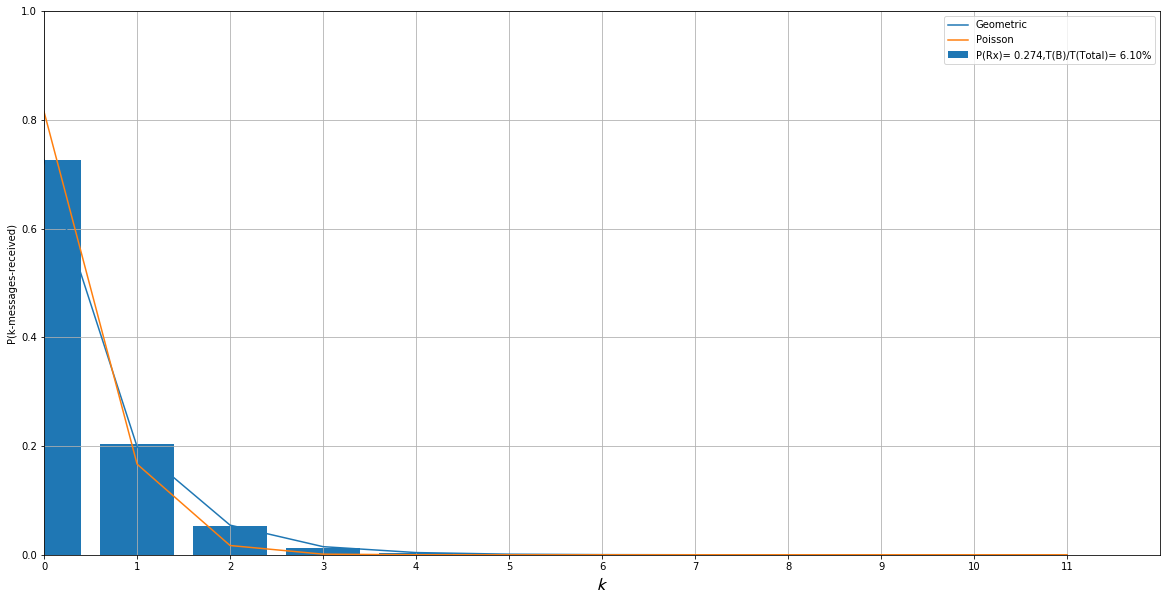

In [7]:
pt.rcParams["figure.figsize"] = (20,10)
pt.plot(range(len(hist1)),geom_d,label='Geometric')
pt.plot(range(len(hist1)),rvd,label='Poisson')
pt.bar(range(len(hist1)),hist1,label="P(Rx)= %.3f,T(B)/T(Total)= %.2f%%"%(sum(hist1[1:]),100*Ttx*Eb/len(raw1)))
pt.legend()
pt.axis([0,len(hist1),0,1.0])
pt.xticks(range(len(hist1)), [str(int(n)) for n in range(len(hist1))])
pt.xlabel(r'$\mathcal{k}$', fontsize = 18)
pt.ylabel(r'P(k-messages-received)')
pt.grid(True)
pt.show()

<span style="color: #9a0000">P(S) = 0.769488</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.230512</span>

<span style="color: #9a0000">P(S) = 0.785896</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.214104</span>

<span style="color: #9a0000">P(S) = 0.800039</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.199961</span>

<span style="color: #9a0000">P(S) = 0.812307</span>

<span style="color: #009a00">P(N) = 0.000001</span>

<span style="color: #00009a">P(B) = 0.187693</span>

<span style="color: #9a0000">P(S) = 0.823277</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.176723</span>

<span style="color: #9a0000">P(S) = 0.833623</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.166377</span>

<span style="color: #9a0000">P(S) = 0.842036</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.157964</span>

<span style="color: #9a0000">P(S) = 0.849947</span>

<span style="color: #009a00">P(N) = 0.000001</span>

<span style="color: #00009a">P(B) = 0.150052</span>

<span style="color: #9a0000">P(S) = 0.857324</span>

<span style="color: #009a00">P(N) = 0.000000</span>

<span style="color: #00009a">P(B) = 0.142676</span>

<span style="color: #9a0000">P(S) = 0.863767</span>

<span style="color: #009a00">P(N) = 0.000001</span>

<span style="color: #00009a">P(B) = 0.136232</span>

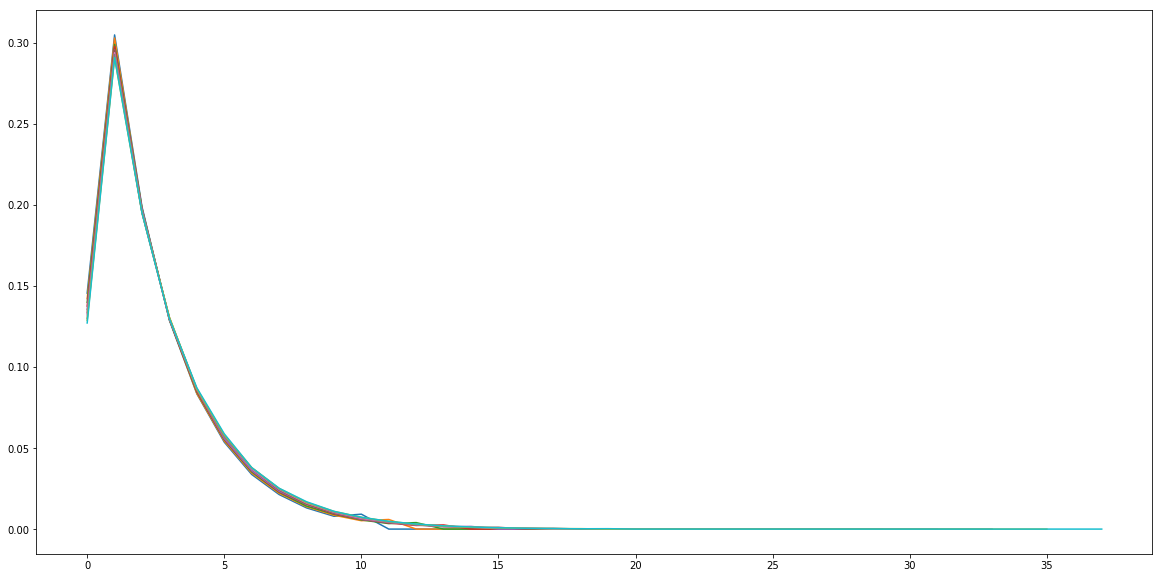

In [8]:
for i in range(10,20):
    f1 = open("r%d-d0-result.txt"%i)
    raw1 = f1.read()
    f1.close()
    f2 = open("r%d-d1-result.txt"%i)
    raw2 = f2.read()
    f2.close()
    Ttx = 1
    Trx = i
    Tn = 1

    Eb,Es,En = computeEvents(raw1,Ttx,Trx,Tn)
    display(Markdown('<span style="color: #9a0000">'+"P(S) = %.6f"%(Trx*Es/len(raw1))+'</span>'))
    display(Markdown('<span style="color: #009a00">'+"P(N) = %.6f"%(Tn*En/len(raw1))+'</span>'))
    display(Markdown('<span style="color: #00009a">'+"P(B) = %.6f"%(Ttx*Eb/len(raw1))+'</span>'))

    Cb1 = countBroadcast(raw2,raw1,Trx,Ttx)

    hist1 = buildHistogram(Cb1,Trx,Ttx)
    pt.rcParams["figure.figsize"] = (20,10)
    pt.plot(range(len(hist1)),hist1,label='Trx= %d'%i)
    
pt.show()
    